

>
## Heart Attack Prediction Using Machine Learning
#### Group Member Names :

 Kelvin Ikrokoto

 Clinton Avornu

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier  # for your contribution

# Make charts look good
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
from google.colab import files

uploaded = files.upload()

cleaned_merged_heart_dataset = list(uploaded.keys())[0]
print("Loaded file:", cleaned_merged_heart_dataset)

df = pd.read_csv(cleaned_merged_heart_dataset)
df.head()


Saving cleaned_merged_heart_dataset.csv to cleaned_merged_heart_dataset.csv
Loaded file: cleaned_merged_heart_dataset.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape of dataset: (1888, 14)

Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target Value Counts:
target
1    977
0    911
Name: count, dtype: int64


/tmp/ipython-input-181296925.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="viridis")


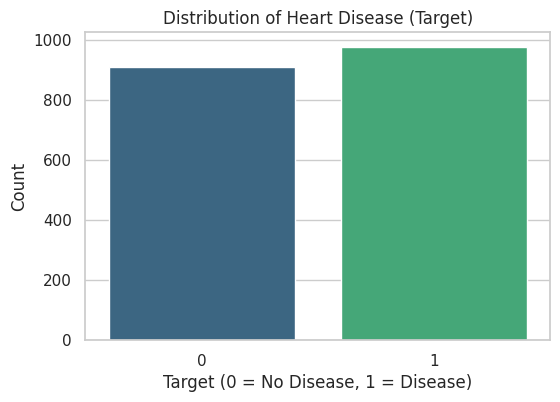

In [3]:
# Basic info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

# Target distribution
print("\nTarget Value Counts:")
print(df["target"].value_counts())

# ---- BAR CHART: Target Distribution ----
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="viridis")
plt.title("Distribution of Heart Disease (Target)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

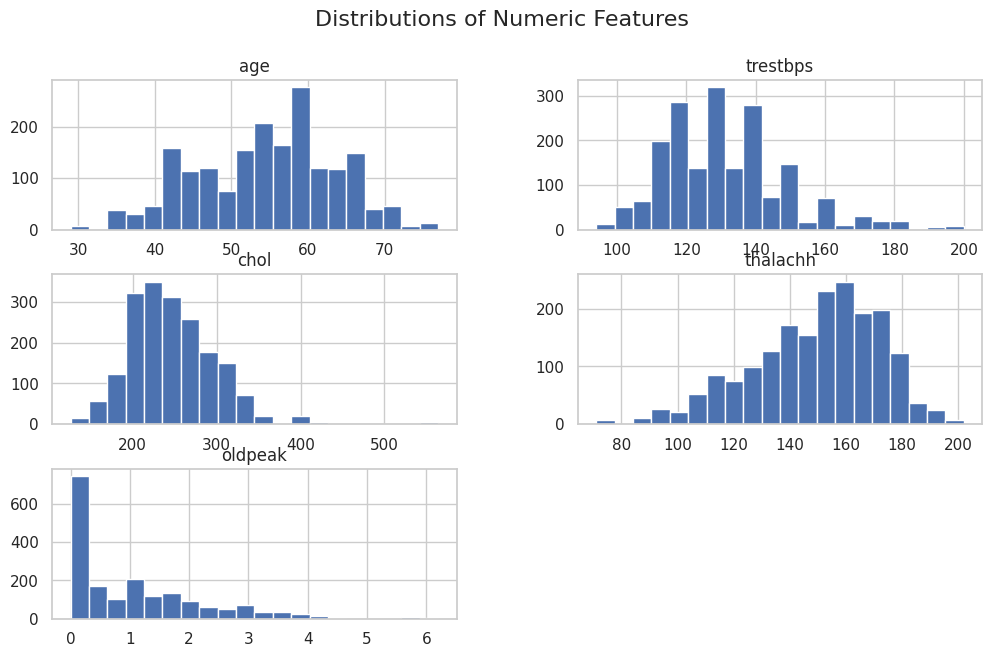

In [6]:
numeric_cols = ["age", "trestbps", "chol", "thalachh", "oldpeak"]

df[numeric_cols].hist(bins=20, figsize=(12, 7), color="#4C72B0")
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.show()

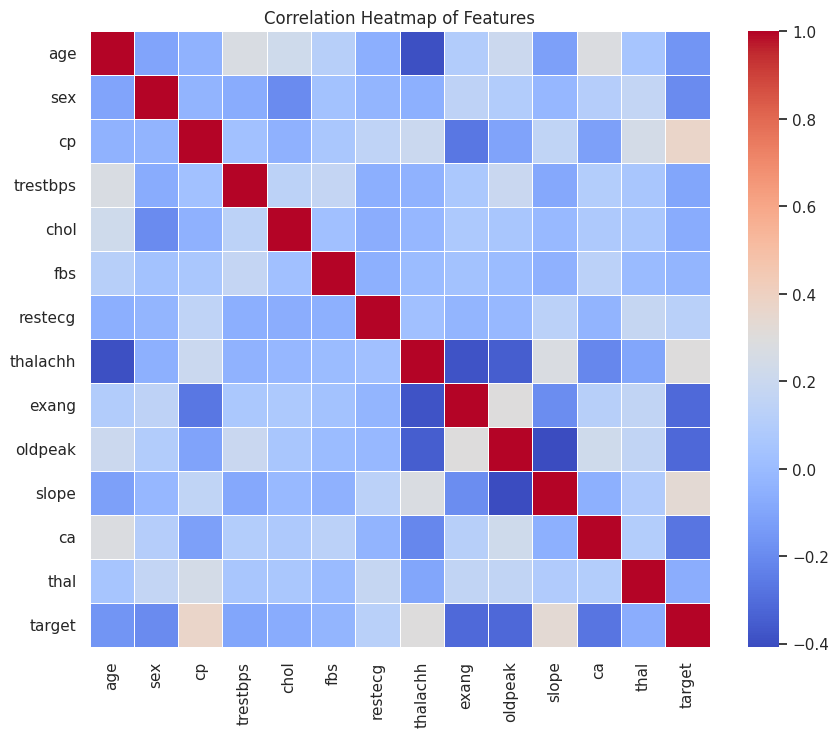

In [7]:
plt.figure(figsize=(10, 8))
corr = df.corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.5,
    annot=False
)

plt.title("Correlation Heatmap of Features")
plt.show()

In [8]:
# 1. Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# 2. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale the data (helps MLP and improves accuracy)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1510, 13)
Test data shape: (378, 13)


In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9761904761904762

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       182
           1       0.98      0.97      0.98       196

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



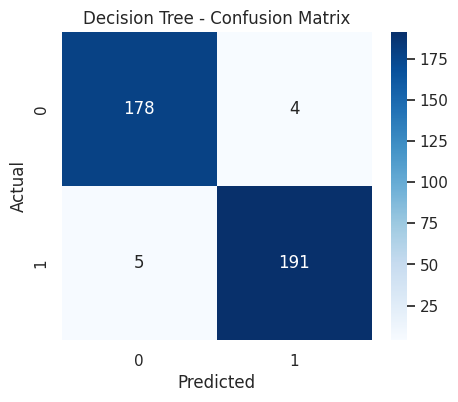

In [10]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

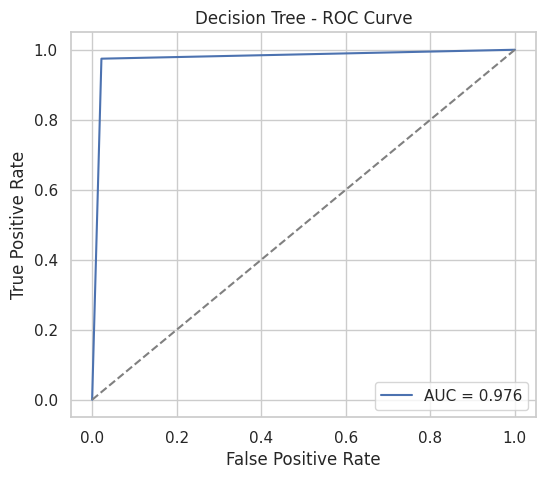

In [11]:
# Calculate ROC curve
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot the curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree - ROC Curve")
plt.legend()
plt.show()

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluation
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", mlp_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.9656084656084656

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       182
           1       0.95      0.98      0.97       196

    accuracy                           0.97       378
   macro avg       0.97      0.96      0.97       378
weighted avg       0.97      0.97      0.97       378



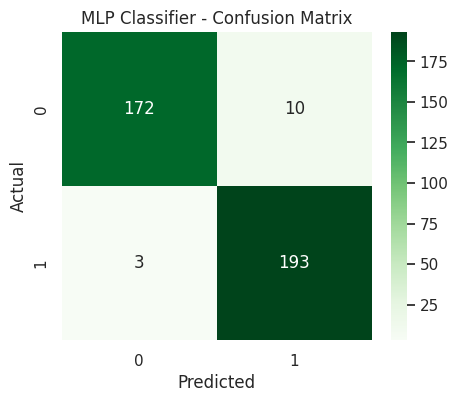

In [13]:
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("MLP Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

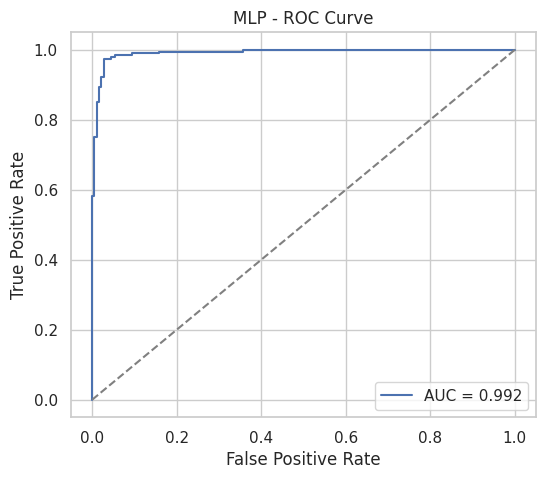

In [14]:
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP - ROC Curve")
plt.legend()
plt.show()

In [15]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9788359788359788

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       182
           1       0.97      0.98      0.98       196

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378



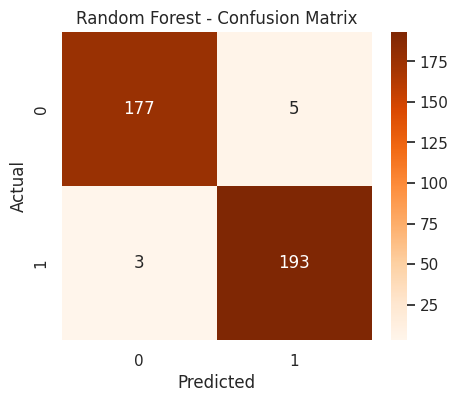

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

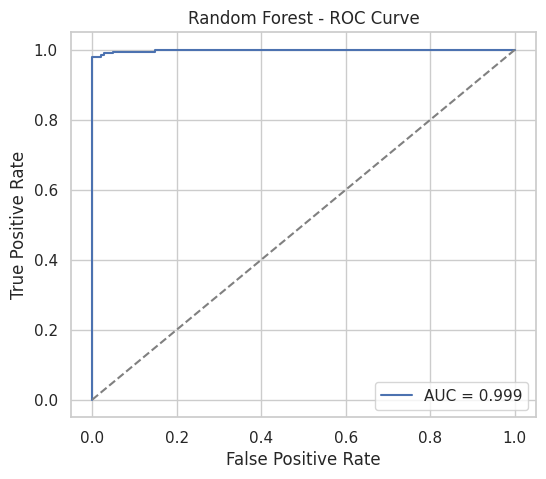

In [17]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.show()

In [19]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "MLP (Neural Network)", "Random Forest"],
    "Accuracy": [dt_accuracy, mlp_accuracy, rf_accuracy]
})

results

,Model,Accuracy
0,Decision Tree,0.976190
1,MLP (Neural Network),0.965608
2,Random Forest,0.978836


/tmp/ipython-input-720028657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results["Model"], y=results["Accuracy"], palette="viridis")


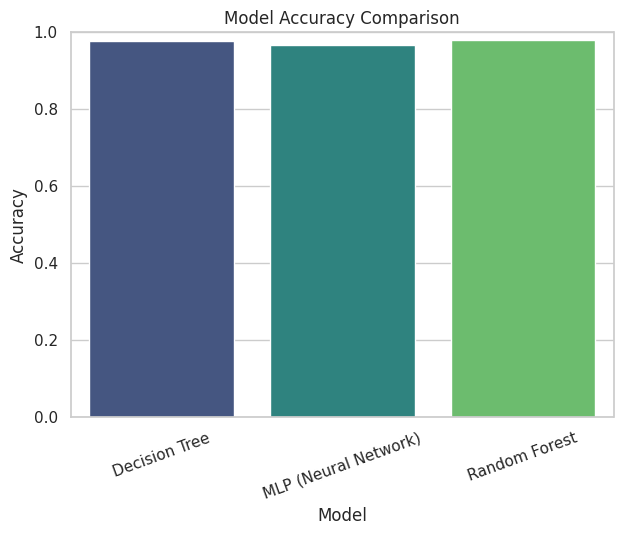

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(x=results["Model"], y=results["Accuracy"], palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()